In [25]:
from shifterator import relative_shift as rs
import shifterator
import json
import os
import pandas as pd
from datetime import datetime
from dotenv import load_dotenv, find_dotenv
from pathlib import Path
from src.func import tweet_utils
from src.func import regex
from src.func import labmtgen
from src.sentiment.senti_utils import *
#from src.scripts.process_tweets import *
from labMTsimple.storyLab import *
import random
import numpy as np
from collections import Counter
from collections import defaultdict
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline


In [12]:
# Loop through cities
tweet_dir= Path("../data/processed/park_user_tweets")
cities = list(tweet_dir.glob("*.json"))


# open stop words
stop_file = Path("../src/sentiment/city_stops.json")
with open(stop_file, 'r') as fp:
    stop_dict  = json.load(fp)

# Load a cities worth of user tweets
city = cities[10]
# with open(city, 'r') as f:
#    park_user_tweets = json.load(f)
results_dir = Path("../data/processed/combined_tweets/tweet_samples_0424/")
with open(results_dir/Path("park_tweets.json"), 'r') as fp:
    park_tweets = json.load(fp)
with open(results_dir/Path("time_tweets.json"), 'r') as fp:
    time_tweets = json.load(fp)
with open(results_dir/Path("user_tweets.json"), 'r') as fp:
    user_tweets = json.load(fp)
with open(results_dir/Path("park_stops.json"), 'r') as fp:
    park_stops = json.load(fp)

park_tweet_text = []
for city, tweets in park_tweets.items():
    park_tweet_text += tweets
time_tweet_text = []
for city, tweets in time_tweets.items():
    time_tweet_text += tweets
stops = []
for city, city_stops in park_stops.items():
    stops+=city_stops
user_tweet_text = []
for city, tweets in user_tweets.items():
    user_tweet_text += tweets
    
stops = list(set([x.lower() for x in dict(regex.get_ngrams(' '.join(stops),
                path='../src/func/ngrams.bin')).keys()]))

freq_stops = []
for city, words in stop_dict.items():
    freq_stops+=words
freq_stops.append('park')
freq_stops = list(set(freq_stops))

all_stops = freq_stops + stops

from labMTsimple.storyLab import *
stops_w_val=[]
words = labmtgen.load_labmt_words("../data/raw/data_labmt_simple.txt")
senti_dict = words.set_index('Word').to_dict()['Happs']
for stop in all_stops:
    if stop in senti_dict.keys():
        val = senti_dict[stop]
        if val <= 4.0 or val >= 6.0:
            #count+=1
            stops_w_val.append(stop)
            #print(stop,senti_dict[stop])
# check how #many of stop words are in labmt outside 4-6 range
print(len(stops_w_val))

568


In [15]:
park_dict =dict(regex.get_ngrams(' '.join(park_tweet_text), path='../src/func/ngrams.bin'))

In [16]:
control_dict =  dict(regex.get_ngrams(' '.join(time_tweet_text), path='../src/func/ngrams.bin'))

In [21]:
for stop_word in stops_w_val:
    try:
        park_dict[stop_word] = 0
    except KeyError:
        pass
    try:
        control_dict[stop_word] = 0
    except KeyError:
        pass

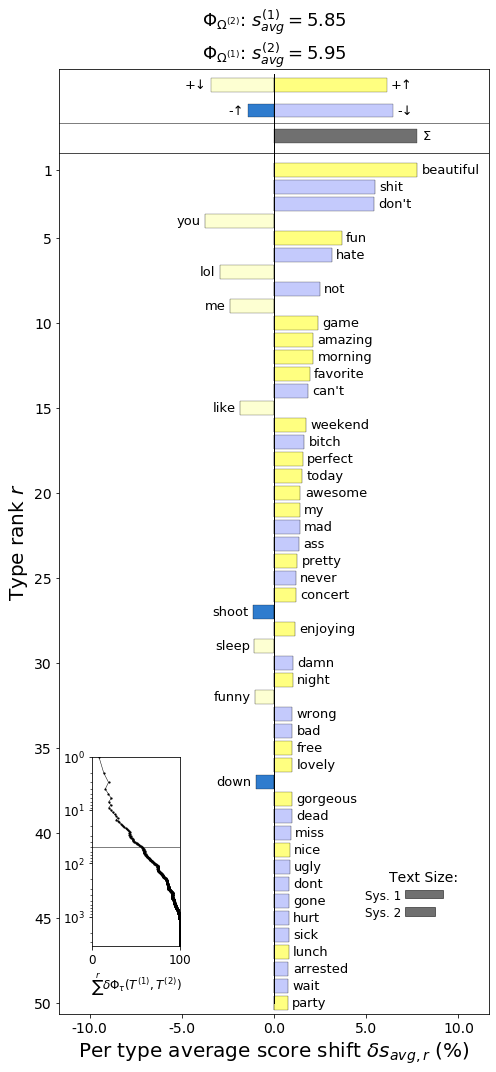

<Figure size 432x288 with 0 Axes>

In [28]:
sentiment_shift = rs.SentimentShift(reference=control_dict,
                                    comparison=park_dict,
                                    sent_dict_ref=senti_dict,
                                   stop_lens=[(4,6)])
s = sentiment_shift.get_shift_graph()
plt.savefig('shifts/shifter_parks.png', dpi=300)

In [31]:
s.figure.savefig('shifts/shifter_parks.png', dpi=300)